In [1]:
import torch
import copy

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from BO import BayesianOptimizer

Crossed Barrel:

In [2]:
raw_dataset = pd.read_csv("datasets/material_science/CrossedBarrel_dataset.csv")
feature_name = list(raw_dataset.columns)[:-1]
objective_name = list(raw_dataset.columns)[-1]
ds = copy.deepcopy(raw_dataset)
ds_grouped = ds.groupby(feature_name)[objective_name].agg(lambda x: x.unique().mean())
ds_grouped = (ds_grouped.to_frame()).reset_index()
X_feature = ds_grouped[feature_name].values

y = np.array(ds_grouped[objective_name].values)
assert len(ds_grouped) == len(X_feature) == len(y)
ch2xy = torch.from_numpy(X_feature).float()
response = torch.from_numpy(y).float()

print(ch2xy.shape, response.shape)

torch.Size([600, 4]) torch.Size([600])


In [31]:
kappa = 20

opt = BayesianOptimizer(ch2xy, response)
regret_bo, baseline = opt.train(
    kappa,
    initial_points=1,
    repetitions=30,
    iterations=150,
    strategy="Vanilla BO",
)
regret_mpbo, _ = opt.train(
    kappa,
    repetitions=30,
    iterations=150,
    strategy="MP-BO",
    begin_strat=20,
    initial_points=20,
    follow_baseline=baseline,
)

  3%|▎         | 1/30 [00:02<01:01,  2.12s/it]/Users/maximemoutet/.pyenv/versions/3.12.2/envs/venv-internship/lib/python3.12/site-packages/gpytorch/distributions/multivariate_normal.py:319: NumericalWarning: Negative variance values detected. This is likely due to numerical instabilities. Rounding negative variances up to 1e-06.
  warnings.warn(
100%|██████████| 30/30 [00:56<00:00,  1.87s/it]


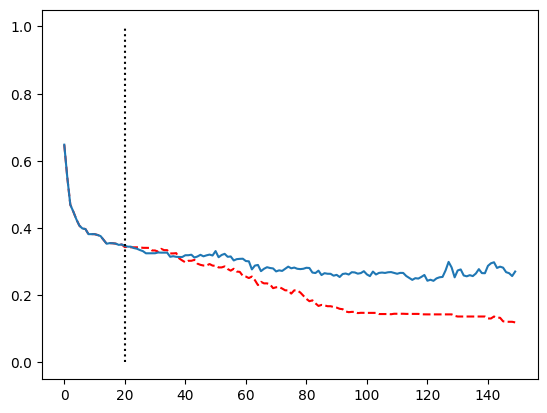

In [33]:
plt.plot(regret_bo.mean(0), color="r", linestyle="--", label="Vanilla BO")
plt.plot(regret_mpbo.mean(0), color="tab:blue", label="MP-BO")
plt.vlines(20, 0, 1, color="k", linestyle="dotted", label="q*=20")

AgNP:

In [52]:
kappa = 5
raw_dataset = pd.read_csv("datasets/material_science/AgNP_dataset.csv")
feature_name = list(raw_dataset.columns)[:-1]
objective_name = list(raw_dataset.columns)[-1]
ds = copy.deepcopy(raw_dataset)
ds_grouped = ds.groupby(feature_name)[objective_name].agg(lambda x: x.unique().mean())
ds_grouped = (ds_grouped.to_frame()).reset_index()
X_feature = ds_grouped[feature_name].values

y = -np.array(ds_grouped[objective_name].values)
assert len(ds_grouped) == len(X_feature) == len(y)
ch2xy = torch.from_numpy(X_feature).float()
response = torch.from_numpy(y).float()

print(ch2xy.shape, response.shape)

torch.Size([164, 5]) torch.Size([164])


In [53]:
opt = BayesianOptimizer(ch2xy, response)
regret_bo, baseline = opt.train(
    kappa,
    initial_points=1,
    repetitions=30,
    iterations=150,
    strategy="Vanilla BO",
)
regret_mpbo, _ = opt.train(
    kappa,
    repetitions=30,
    iterations=150,
    strategy="MP-BO",
    begin_strat=20,
    initial_points=20,
    follow_baseline=baseline,
)

100%|██████████| 30/30 [00:44<00:00,  1.49s/it]


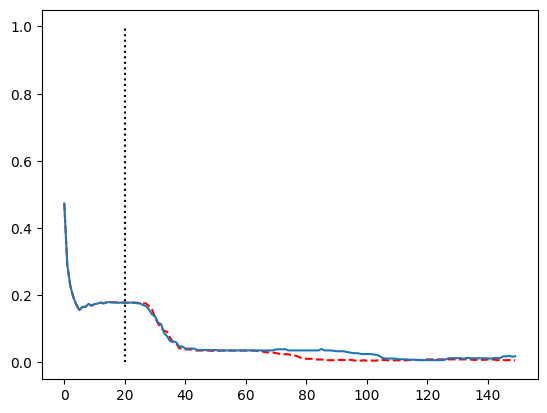

In [54]:
plt.plot(regret_bo.mean(0), color="r", linestyle="--", label="Vanilla BO")
plt.plot(regret_mpbo.mean(0), color="tab:blue", label="MP-BO")
plt.vlines(20, 0, 1, color="k", linestyle="dotted", label="q*=20")

Perovskite:

In [3]:
kappa = 5
raw_dataset = pd.read_csv("datasets/material_science/Perovskite_dataset.csv")
feature_name = list(raw_dataset.columns)[:-1]
objective_name = list(raw_dataset.columns)[-1]
ds = copy.deepcopy(raw_dataset)
ds_grouped = ds.groupby(feature_name)[objective_name].agg(lambda x: x.unique().mean())
ds_grouped = (ds_grouped.to_frame()).reset_index()
X_feature = ds_grouped[feature_name].values

y = -np.array(ds_grouped[objective_name].values)
assert len(ds_grouped) == len(X_feature) == len(y)
ch2xy = torch.from_numpy(X_feature).float()
response = torch.from_numpy(y).float()

print(ch2xy.shape, response.shape)

torch.Size([94, 3]) torch.Size([94])


In [10]:
opt = BayesianOptimizer(ch2xy, response)
regret_bo, baseline = opt.train(
    kappa,
    initial_points=5,
    repetitions=30,
    iterations=150,
    strategy="Vanilla BO",
)
regret_mpbo, _ = opt.train(
    kappa,
    repetitions=30,
    iterations=150,
    strategy="MP-BO",
    begin_strat=30,
    initial_points=30,
    follow_baseline=baseline,
)

 77%|███████▋  | 23/30 [00:43<00:13,  1.86s/it]

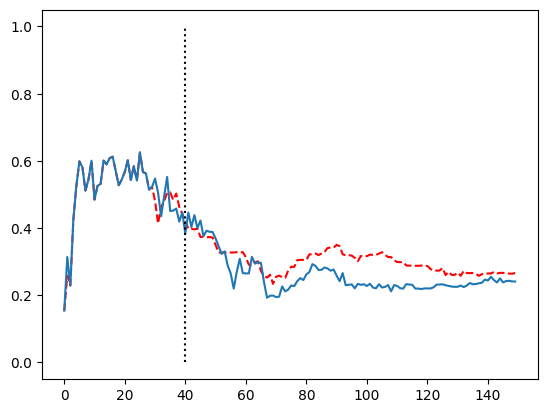

In [9]:
plt.plot(regret_bo.mean(0), color="r", linestyle="--", label="Vanilla BO")
plt.plot(regret_mpbo.mean(0), color="tab:blue", label="MP-BO")
plt.vlines(30, 0, 1, color="k", linestyle="dotted", label="q*=40")